In [1]:
from pybaseball import statcast, batting_stats_range, batting_stats, statcast_pitcher
import pandas as pd
import math                                               # basic calculations like square root
from sklearn import tree                                  # tree program from scikit learn (package for machine learning)
from sklearn.tree import _tree                            # for accessing tree information
from sklearn.model_selection import cross_val_score, GridSearchCV       # cross validation methods
from sklearn.tree import export_graphviz                  # graphical visualization of trees
from sklearn.preprocessing import StandardScaler          # standardize variables to mean of 0.0 and variance of 1.0
import pandas as pd                                       # DataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                        # arrays and matrix math
import matplotlib.pyplot as plt                           # plotting
from subprocess import check_call
from sklearn.model_selection import train_test_split      # train and test split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
# import mean_squared_error from scikit learn
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report # measures to check our models


In [2]:
#mechanisim to upload statcast data per data needed. best to run one at a time , long time to load. 
# data = statcast(start_dt = "2019-03-20", end_dt='2019-07-21')
# data18 = statcast(start_dt = "2018-03-20", end_dt='2018-09-30')
# data17 = statcast(start_dt = "2017-03-15", end_dt='2017-10-01')
# data.shape

In [3]:
#check columns and data
# data.columns

In [4]:
#create 2019 statcast dataframe and we repeat for necessary years, best to run one at a time , long time to load. 
# statcast_2019 = pd.DataFrame(data)
# statcast_2018 = pd.DataFrame(data18)
# statcast_2017 = pd.DataFrame(data17)
# statcast_2019.head()

In [5]:
#send our data to csv files for later use, files are large, so only running locally
# statcast_2019.to_csv("Data/statcast_2019.csv", index=False)
# statcast_2018.to_csv("Data/statcast_2018.csv", index=False)
# statcast_2017.to_csv("Data/statcast_2017.csv", index=False)

In [218]:
#Moving forward, will upload files into a database, download sql file to allow for other users to run notebook propersly

In [6]:
#import our 2018 statcast data for clean up and analysis and 2017 data
statcast_2018_df = pd.read_csv("data/statcast_2018.csv")
statcast_2017_df = pd.read_csv("data/statcast_2017.csv")

C:\Users\omarc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#check the sizes of our files
print(statcast_2018_df.shape)
print(statcast_2017_df.shape)


(720660, 90)
(721243, 90)


In [8]:
#combine our 2 data sets into one data frame
combined_17_18_df = pd.concat([statcast_2018_df,statcast_2017_df], ignore_index=True)

In [9]:
#check our numbers
combined_17_18_df.shape

(1441903, 90)

In [10]:
#preview your combined dataframe
combined_17_18_df.head()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,301,SI,2018-09-30,91.0,1.7763,5.9076,Chris Rusin,665742.0,543734.0,field_out,...,12.0,0.0,0.0,12.0,0.0,12.0,0.0,12.0,Standard,Standard
1,317,FC,2018-09-30,87.0,1.8609,5.9953,Chris Rusin,665742.0,543734.0,NaN,...,12.0,0.0,0.0,12.0,0.0,12.0,0.0,12.0,Standard,Standard
2,325,FC,2018-09-30,87.5,1.9144,5.9589,Chris Rusin,665742.0,543734.0,NaN,...,12.0,0.0,0.0,12.0,0.0,12.0,0.0,12.0,Standard,Standard
3,337,SI,2018-09-30,91.3,1.9906,5.9776,Chris Rusin,543685.0,543734.0,field_out,...,12.0,0.0,0.0,12.0,0.0,12.0,0.0,12.0,Standard,Standard
4,353,CU,2018-09-30,82.2,1.7804,5.7634,Chris Rusin,547180.0,543734.0,double,...,12.0,0.0,0.0,12.0,0.0,12.0,0.0,12.0,Infield shift,Standard


In [12]:
#check our columns
# combined_17_18_df.columns

In [13]:
#create a new df with new columns
#note that player_name stands for pitcher in this database will need to clean up, for future reference if need to add player names, can cross reference mlb player IDs
#start looking at spatial data analysis
#create a new dataframe to help create the statcast zones
zone_analysis_columns = ['pitch_type', 'release_speed', 'release_spin_rate', 'release_extension', 'zone', 'launch_speed','launch_angle', 'launch_speed_angle', 'events']
graph_analysis_columns = ['pitch_type','plate_x','plate_z', 'release_speed', 'release_spin_rate', 'release_extension', 'zone', 'launch_speed','launch_angle', 'launch_speed_angle', 'events']
strike_zone = ["zone", 'plate_x']
statcast_combined_clean = combined_17_18_df[zone_analysis_columns]
statcast_combined_graph = combined_17_18_df[graph_analysis_columns]
statcast_zone = combined_17_18_df[strike_zone]

In [15]:
#check our statcast_zone
# statcast_zone.head()

In [16]:
#filter out zone data to only include strike zone data, zones 1-9
# statcast_strike_zone = statcast_zone.loc[statcast_zone['zone'] <= 9]
# statcast_strike_zone.describe().transpose()

In [20]:
#this code can be used in future to begin mapping zones in a plot
#group our data by zone, and calculate the min, max, mean, standard deviation
# statcast_strike_zone_group = statcast_strike_zone.groupby(['zone']).min()
# statcast_strike_zone_group['mean_plate_x'] = statcast_strike_zone.groupby(['zone']).mean()
# statcast_strike_zone_group['max_plate_x'] = statcast_zone.groupby(['zone']).max()
# statcast_strike_zone_group['sd_plate_x'] = statcast_zone.groupby(['zone']).std()
#rename our first colum to min_plate_x
# statcast_strike_zone_group = statcast_strike_zone_group.rename(columns={'plate_x': 'min_plate_x'})
#check our new data set, and we see we have only zones 1 to 9 now
# statcast_strike_zone_group.head(9)

In [21]:
#preview our combined dataset
statcast_combined_clean.head()

,pitch_type,release_speed,release_spin_rate,release_extension,zone,launch_speed,launch_angle,launch_speed_angle,events
0,SI,91.0,2365.0,5.540,9.0,84.6,-28.0,2.0,field_out
1,FC,87.0,2321.0,5.262,3.0,NaN,NaN,NaN,NaN
2,FC,87.5,2297.0,5.169,5.0,NaN,NaN,NaN,NaN
3,SI,91.3,2482.0,5.356,14.0,73.6,-22.0,2.0,field_out
4,CU,82.2,2649.0,5.131,8.0,95.9,11.0,4.0,double


In [22]:
#preview with describe to see missing variables
statcast_combined_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_speed,1436883.0,88.625021,5.967611,40.900,84.500,90.000,93.200,105.0000
release_spin_rate,1411505.0,2222.510527,310.386531,413.000,2077.000,2243.000,2404.000,3726.0000
release_extension,1436837.0,6.006687,0.508305,-0.916,5.673,6.012,6.346,10.4348
zone,1436612.0,9.118651,4.204725,1.000,5.000,11.000,13.000,14.0000
launch_speed,407785.0,82.256653,15.642561,3.400,72.500,82.900,94.500,129.8000
launch_angle,407807.0,15.937953,29.098109,-89.000,-4.000,17.000,36.000,90.0000
launch_speed_angle,253729.0,3.122556,1.255199,1.000,2.000,3.000,4.000,6.0000


In [23]:
# plots a graphical correlation matrix 
def plot_corr(dataframe,size=10):                         
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Statcast Correlation Matrix:2017-2018')
    

In [25]:
#create a new column "HR", where if events =home_run, you have a 1, otherwise you have a 0
statcast_combined_clean['HR'] = np.where(statcast_combined_clean['events']=='home_run',1,0)
statcast_combined_graph['HR'] = np.where(statcast_combined_graph['events']=='home_run',1,0)

C:\Users\omarc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\omarc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
#combined data not using the plate x and z info
statcast_combined_clean.shape

(1441903, 10)

In [29]:
#combined data for graph analysis preview(data includes plate x and z)
statcast_combined_graph.shape

(1441903, 12)

In [30]:
#now filter out to pitch_type = FF(Four Seam Fastball)/FT(Two Seam Fastball)/CU(Curveball)/SL(Slider)/CH(Change-UP)/FC(Fastball Cutter)
statcast_combined_ff_analysis = statcast_combined_clean.loc[statcast_combined_clean['pitch_type']=='FF']
statcast_combined_ft_analysis = statcast_combined_clean.loc[statcast_combined_clean['pitch_type']=='FT']
statcast_combined_cu_analysis = statcast_combined_clean.loc[statcast_combined_clean['pitch_type']=='CU']
statcast_combined_sl_analysis = statcast_combined_clean.loc[statcast_combined_clean['pitch_type']=='SL']
statcast_combined_ch_analysis = statcast_combined_clean.loc[statcast_combined_clean['pitch_type']=='CH']
statcast_combined_fc_analysis = statcast_combined_clean.loc[statcast_combined_clean['pitch_type']=='FC']

In [31]:
#line items for total pitches, and per pitch
print(statcast_combined_clean.shape)
print(statcast_combined_ff_analysis.shape)
print(statcast_combined_ft_analysis.shape)
print(statcast_combined_cu_analysis.shape)
print(statcast_combined_sl_analysis.shape)
print(statcast_combined_ch_analysis.shape)
print(statcast_combined_fc_analysis.shape)

(1441903, 10)
(508684, 10)
(173138, 10)
(113324, 10)
(239317, 10)
(146986, 10)
(76868, 10)


In [33]:
#here we see that there were a total of homeruns hit in 2017-2018 on all pitches and individual pitches
print(len(statcast_combined_clean[statcast_combined_clean.HR == 1]))
print(len(statcast_combined_ff_analysis[statcast_combined_ff_analysis.HR == 1]))
print(len(statcast_combined_ft_analysis[statcast_combined_ft_analysis.HR == 1]))
print(len(statcast_combined_cu_analysis[statcast_combined_cu_analysis.HR == 1]))
print(len(statcast_combined_sl_analysis[statcast_combined_sl_analysis.HR == 1]))
print(len(statcast_combined_ch_analysis[statcast_combined_ch_analysis.HR == 1]))
print(len(statcast_combined_fc_analysis[statcast_combined_fc_analysis.HR == 1]))

11685
4662
1372
736
1804
1228
612


In [36]:
#we'll remove the launch speed, angle launch speed angle and focus on pitch data, and zone location
pitch_zone_hr_columns = ['release_speed', 'release_spin_rate', 'release_extension', 'zone', 'HR']

In [37]:
#for our final all pitches, and pitch type(i.e fastball) HR analysis , we'll get rid of launch_speed, launch angle, and launch_speed angle, and our pitch_type column
statcast_combined_all_clean = statcast_combined_clean[pitch_zone_hr_columns]
statcast_combined_ff_analysis_clean = statcast_combined_ff_analysis[pitch_zone_hr_columns]
statcast_combined_ft_analysis_clean = statcast_combined_ft_analysis[pitch_zone_hr_columns]
statcast_combined_cu_analysis_clean = statcast_combined_cu_analysis[pitch_zone_hr_columns]
statcast_combined_sl_analysis_clean = statcast_combined_sl_analysis[pitch_zone_hr_columns]
statcast_combined_ch_analysis_clean = statcast_combined_ch_analysis[pitch_zone_hr_columns]
statcast_combined_fc_analysis_clean = statcast_combined_fc_analysis[pitch_zone_hr_columns]


In [38]:
#after removing launch speed, angle and speed angle we note we still have na values to drop
statcast_combined_ff_analysis_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_speed,508578.0,93.181668,2.772824,51.900,91.40,93.200,95.100,104.200
release_spin_rate,508478.0,2260.232042,172.325270,461.000,2146.00,2263.000,2376.000,3660.000
release_extension,508577.0,6.161680,0.471307,3.508,5.85,6.163,6.477,9.888
zone,508525.0,8.276193,4.273474,1.000,5.00,9.000,12.000,14.000
HR,508684.0,0.009165,0.095293,0.000,0.00,0.000,0.000,1.000


In [39]:
#drop missing column data
statcast_combined_all_analysis_final = statcast_combined_all_clean.dropna()
statcast_combined_ff_analysis_final = statcast_combined_ff_analysis_clean.dropna()
statcast_combined_ft_analysis_final = statcast_combined_ft_analysis_clean.dropna()
statcast_combined_cu_analysis_final = statcast_combined_cu_analysis_clean.dropna()
statcast_combined_sl_analysis_final = statcast_combined_sl_analysis_clean.dropna()
statcast_combined_ch_analysis_final = statcast_combined_ch_analysis_clean.dropna()
statcast_combined_fc_analysis_final = statcast_combined_fc_analysis_clean.dropna()
statcast_combined_graph_final=statcast_combined_graph.dropna()

In [40]:
statcast_combined_all_analysis_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_speed,1411280.0,88.729069,5.943312,40.900,84.600,90.100,93.300,105.0000
release_spin_rate,1411280.0,2222.510101,310.391597,413.000,2077.000,2243.000,2404.000,3726.0000
release_extension,1411280.0,6.011092,0.508611,-0.916,5.679,6.017,6.351,10.4348
zone,1411280.0,9.104007,4.204881,1.000,5.000,11.000,13.000,14.0000
HR,1411280.0,0.008112,0.089703,0.000,0.000,0.000,0.000,1.0000


In [42]:
#we'll have 111,325 lines to analyze for curveballs
statcast_combined_cu_analysis_final.shape

(111325, 5)

In [43]:
#calculate our correlation matrix for al pitches 2017-2018
corr_matrix_all_HR = np.corrcoef(statcast_combined_all_analysis_final, rowvar=False)
print(np.around(corr_matrix_all_HR,2))

[[ 1.   -0.01  0.32 -0.13  0.  ]
 [-0.01  1.   -0.15 -0.01 -0.01]
 [ 0.32 -0.15  1.   -0.04  0.  ]
 [-0.13 -0.01 -0.04  1.   -0.08]
 [ 0.   -0.01  0.   -0.08  1.  ]]


In [44]:
#calculate our correlation matrix for FF 2017-2018
corr_matrix_ff_HR = np.corrcoef(statcast_combined_ff_analysis_final, rowvar=False)
print(np.around(corr_matrix_ff_HR,2))

[[ 1.    0.31  0.1  -0.01 -0.02]
 [ 0.31  1.   -0.07  0.   -0.01]
 [ 0.1  -0.07  1.   -0.   -0.  ]
 [-0.01  0.   -0.    1.   -0.07]
 [-0.02 -0.01 -0.   -0.07  1.  ]]


In [45]:
#calculate our correlation matrix for FT, two seam fastball
corr_matrix_ft_HR = np.corrcoef(statcast_combined_ft_analysis_final, rowvar=False)
print(np.around(corr_matrix_ft_HR,2))

[[ 1.    0.23  0.13 -0.05 -0.01]
 [ 0.23  1.    0.01 -0.02  0.  ]
 [ 0.13  0.01  1.   -0.01  0.  ]
 [-0.05 -0.02 -0.01  1.   -0.07]
 [-0.01  0.    0.   -0.07  1.  ]]


In [46]:
#calculate our correlation matrix for CU, curveball
corr_matrix_cu_HR = np.corrcoef(statcast_combined_cu_analysis_final, rowvar=False)
print(np.around(corr_matrix_cu_HR,2))

[[ 1.    0.17  0.13  0.06 -0.01]
 [ 0.17  1.   -0.12  0.04 -0.01]
 [ 0.13 -0.12  1.    0.05 -0.01]
 [ 0.06  0.04  0.05  1.   -0.07]
 [-0.01 -0.01 -0.01 -0.07  1.  ]]


In [47]:
#calculate our correlation matrix for SL, slider
corr_matrix_sl_HR = np.corrcoef(statcast_combined_sl_analysis_final, rowvar=False)
print(np.around(corr_matrix_sl_HR,2))

[[ 1.    0.03  0.2   0.03 -0.01]
 [ 0.03  1.   -0.16  0.04 -0.01]
 [ 0.2  -0.16  1.    0.05 -0.  ]
 [ 0.03  0.04  0.05  1.   -0.09]
 [-0.01 -0.01 -0.   -0.09  1.  ]]


In [48]:
#calculate our correlation matrix for CH change up
corr_matrix_ch_HR = np.corrcoef(statcast_combined_ch_analysis_final, rowvar=False)
print(np.around(corr_matrix_ch_HR,2))

[[ 1.    0.02  0.18  0.02 -0.01]
 [ 0.02  1.   -0.13  0.    0.  ]
 [ 0.18 -0.13  1.   -0.   -0.  ]
 [ 0.02  0.   -0.    1.   -0.1 ]
 [-0.01  0.   -0.   -0.1   1.  ]]


In [49]:
#calculate our correlation matrix for FC, fastball cutter
corr_matrix_fc_HR = np.corrcoef(statcast_combined_fc_analysis_final, rowvar=False)
print(np.around(corr_matrix_fc_HR,2))

[[ 1.    0.31  0.15 -0.02 -0.01]
 [ 0.31  1.   -0.09  0.04 -0.  ]
 [ 0.15 -0.09  1.    0.   -0.  ]
 [-0.02  0.04  0.    1.   -0.08]
 [-0.01 -0.   -0.   -0.08  1.  ]]


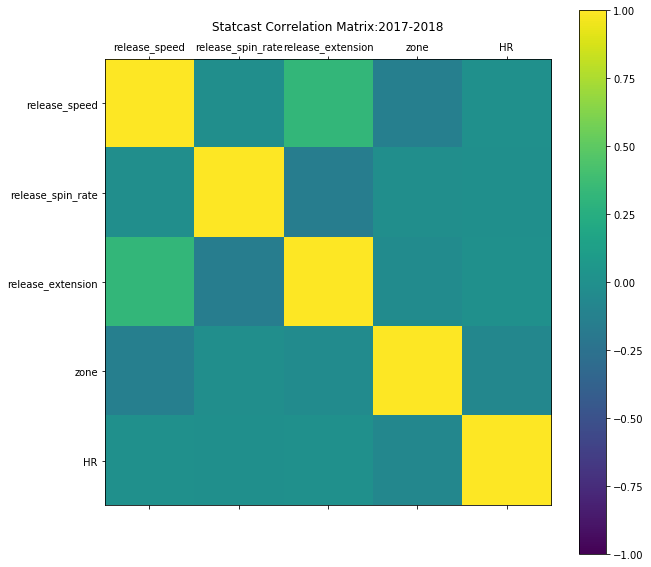

In [52]:
#here we demonstrate correlation matrix chart for all pitches
plot_corr(statcast_combined_all_analysis_final,10)  # using our correlation matrix visualization function
plt.savefig('Images/Statcast Correlation Matrix')
plt.show()

In [53]:
#we first run our model with the entire data set

#define my dependent and independent variables
X_all = statcast_combined_all_analysis_final[['release_speed', 'release_spin_rate', 'release_extension', 'zone']]
y_all = statcast_combined_all_analysis_final["HR"]

#split our data
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all,y_all, random_state=42)

#normalize our data, use standard scalar
X_scaler_all = StandardScaler().fit(X_all_train)

#transform our data
X_all_train_scaled = X_scaler_all.transform(X_all_train)
X_all_test_scaled = X_scaler_all.transform(X_all_test)

#our model for Two-Seam Fastballs
model_all = LogisticRegression(C=1.0, penalty='l2', random_state=0, solver='saga', max_iter=5000)

#fit our model
model_all.fit(X_all_train_scaled, y_all_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

(352820,)

In [54]:
#our predictions for all pitches
predictions_all = model_all.predict(X_all_test_scaled)

#our MSE and R2 for all pitches Model
MSE_all = mean_squared_error(y_all_test, predictions_all)
r2_all = model_all.score(X_all_test_scaled, y_all_test)

print(f'MSE:{MSE_all} R2:{r2_all}')

MSE:0.008247831755569411 R2:0.9917521682444306


In [63]:
#we note that our the weights on our data our causing our model to only predict 0, no homeruns
conf_all = confusion_matrix(y_all_test, predictions_all)
print(conf_all)

[[349910      0]
 [  2910      0]]


In [89]:
#our classification report
print(classification_report(y_all_test, predictions_all))

C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    349910
           1       0.00      0.00      0.00      2910

    accuracy                           0.99    352820
   macro avg       0.50      0.50      0.50    352820
weighted avg       0.98      0.99      0.99    352820



In [68]:
#lets look at a decision tree
X_all_tree = statcast_combined_all_analysis_final[['release_speed', 'release_spin_rate', 'release_extension', 'zone']]
y_all_tree = statcast_combined_all_analysis_final["HR"]

#split our data for our four seam fastball analysis
X_all_tree_train, X_all_tree_test, y_all_tree_train, y_all_tree_test = train_test_split(X_all_tree,y_all_tree, random_state=42)

clf_all = RandomForestClassifier(class_weight = 'balanced_subsample')
clf_all = clf_all.fit(X_all_tree_train, y_all_tree_train)


C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
tree_all_prediction = clf_all.predict(X_all_tree_test)
print(classification_report(y_all_tree_test, tree_all_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    349910
           1       0.00      0.00      0.00      2910

    accuracy                           0.99    352820
   macro avg       0.50      0.50      0.50    352820
weighted avg       0.98      0.99      0.99    352820



In [70]:
#based on our initial analysis above , we are doing downsize our data and even out the weight distribution between our x and y values
#create two data frames to start down sizing our sample for non_hr
all_non_hr = statcast_combined_all_analysis_final.loc[statcast_combined_all_analysis_final.HR == 0]
all_hr = statcast_combined_all_analysis_final.loc[statcast_combined_all_analysis_final.HR == 1]

In [73]:
#we see the size of all non-hr data 
all_non_hr.shape

(1399831, 5)

In [74]:
#check our HR data
all_hr.shape

(11449, 5)

In [75]:
#we are going to downsize our non-hr data to 1% of the original data
sample_non_hr = all_non_hr.sample(frac=0.01, replace=True, random_state=1)

In [76]:
sample_non_hr.shape

(13998, 5)

In [81]:
#combine our two data sets, now with our down-sized non-hr data
sample_combined = pd.concat([sample_non_hr, all_hr], ignore_index=True)

In [ ]:
sample_combined.shape

In [83]:
#now we will run a logistic regression on the downsized sample data, remember this data includes all pitch types
#define my dependent and independent variables
X_sample_all = sample_combined[['release_speed', 'release_spin_rate', 'release_extension', 'zone']]
y_sample_all = sample_combined["HR"]

#split our data
X_sample_all_train, X_sample_all_test, y_sample_all_train, y_sample_all_test = train_test_split(X_sample_all,y_sample_all, random_state=42)

#normalize our data, use standard scalar
X_scaler_sample = StandardScaler().fit(X_sample_all_train)

#transform our data
X_sample_train_scaled = X_scaler_sample.transform(X_sample_all_train)
X_sample_test_scaled = X_scaler_sample.transform(X_sample_all_test)

In [84]:
#perform a grid search to tune our model
grid = {'C':np.logspace(-3,3,7), "penalty":["l1", 'l2']}
logreg=LogisticRegression(random_state=0)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_sample_train_scaled, y_sample_all_train)


C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omarc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [85]:
#here we pring out the tuned hyperparameters of our sample data
print("tuned hyperparameters :(best parameters) {}".format(logreg_cv.best_params_))
print("accuracy: {}".format(logreg_cv.best_score_))

tuned hyperparameters :(best parameters) {'C': 1.0, 'penalty': 'l1'}
accuracy: 0.6980875032748232


In [86]:
#our model for our new sample data, using our tuned information from above
model_sample = LogisticRegression(C=1.0, penalty='l1', random_state=0, solver='saga', max_iter=5000)

#fit our model
model_sample.fit(X_sample_train_scaled, y_sample_all_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
#our predictions using sample data
predictions_sample = model_sample.predict(X_sample_test_scaled)
conf_sample = confusion_matrix(y_sample_all_test, predictions_sample)

In [90]:
#we now analyze the confusion maxtrix for our sample
print(conf_sample)

[[2362 1149]
 [ 853 1998]]


In [88]:
print(classification_report(y_sample_all_test, predictions_sample, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      3511
           1       0.63      0.70      0.67      2851

    accuracy                           0.69      6362
   macro avg       0.68      0.69      0.68      6362
weighted avg       0.69      0.69      0.69      6362



In [92]:
#our MSE and R2 for all sample data Model
MSE_sample = mean_squared_error(y_sample_all_test, predictions_sample)
r2_sample = model_sample.score(X_sample_test_scaled, y_sample_all_test)
#preview our MSE and R2 for our four seam fastball data
print(f'MSE:{MSE_sample} R2:{r2_sample}')

MSE:0.3146809179503301 R2:0.68531908204967


In [94]:
#lets look at a decision tree again now with our sample data
# X_sample_tree = sample_combined[['release_speed', 'release_spin_rate', 'release_extension', 'zone']]
# y_sample_tree = sample_combined["HR"]

#split our data for our sample data
# X_sample_tree_train, X_sample_tree_test, y_sample_tree_train, y_sample_tree_test = train_test_split(X_sample_tree,y_sample_tree, random_state=42)

In [97]:
#perform a grid search to tune our model
# grid_rf = {'n_estimators':[16,32,64,128,256], "max_depth":np.linspace(5,100, num=5), "min_samples_leaf":np.linspace(0.1,.5, num=5)}
# rf=RandomForestClassifier(random_state=0)
# rf_cv=GridSearchCV(rf,grid_rf,cv=10)
# rf_cv.fit(X_sample_tree_train, y_sample_tree_train)


In [98]:
# print("tuned hyperparameters :(best parameters) {}".format(rf_cv.best_params_))
# print("accuracy: {}".format(rf_cv.best_score_))

In [99]:
# clf_sample = RandomForestClassifier()
# clf_sample = clf_sample.fit(X_sample_tree_train, y_sample_tree_train)

In [100]:
# clf_sample

In [101]:
# tree_sample_prediction = clf_sample.predict(X_sample_tree_test)
# print(classification_report(y_sample_tree_test, tree_sample_prediction))

In [221]:
#use our sample model to compare with the actuals of our total data set
#our predictions for all pitches
sample_model_predictions_all = model_sample.predict(X_all_test_scaled)

#our MSE and R2 for all pitches Model
MSE_sample_all = mean_squared_error(y_all_test, sample_model_predictions_all)
r2_sample_all = model_sample.score(X_all_test_scaled, y_all_test)

print(f'MSE:{MSE_sample_all} R2:{r2_sample_all}')

MSE:0.3996655518394649 R2:0.6003344481605352


In [222]:
#classification report for our test from above
print(classification_report(y_all_test, sample_model_predictions_all, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75    349910
           1       0.02      0.82      0.03      2910

    accuracy                           0.60    352820
   macro avg       0.51      0.71      0.39    352820
weighted avg       0.99      0.60      0.74    352820



In [106]:
#function to remove outliers for graphical purposes
def remove_outliers(df,columns):
    for column in columns:
        q_lo = df[column].quantile(.25)
        q_hi = df[column].quantile(.75)
        q_iqr = q_hi - q_lo
        median = df[column].quantile(.5)
    
        df =  df.loc[(df[column] > median-3*q_iqr) & (df[column] < median+3*q_iqr)]
        
    return df
    
    

In [107]:
#create new data frame with outliers removed for plate_x and plate_z data
statcast_graph_new = remove_outliers(statcast_combined_graph_final, ['plate_x', 'plate_z'])
#statcast_graph_new.loc[statcast_graph_new['HR'] == 0,'HR'] = 'Not Home Run'
#statcast_graph_new.loc[statcast_graph_new['HR'] == 1,'HR'] = 'Home Run'

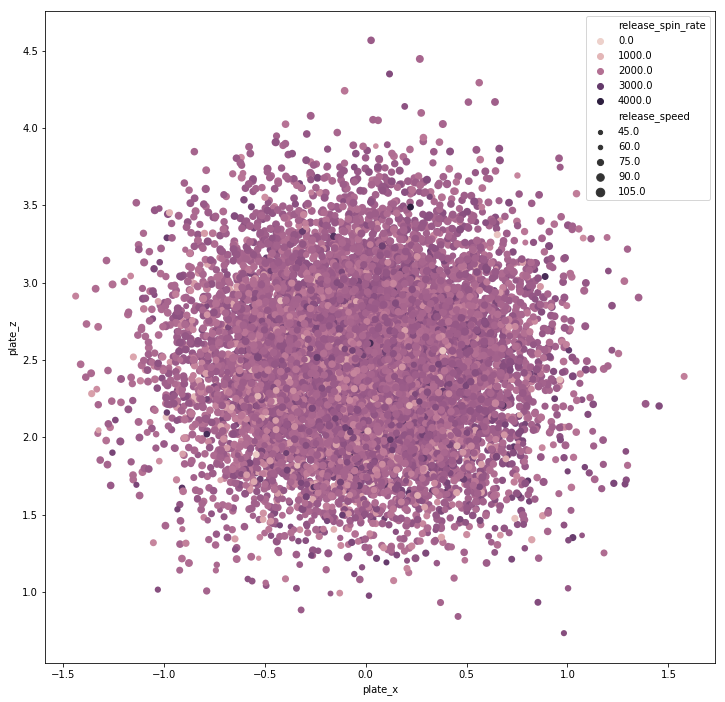

In [109]:
#create our first scatter plot , this includes all the data
f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(x="plate_x", y="plate_z",
                hue="release_spin_rate", #size="depth",
                #palette=cmap,
                size='release_speed',
                #hue_order=['Not Home Run','Home Run'],
                s=10, linewidth=0, #alpha=0.5,
                data=statcast_graph_new.loc[statcast_graph_new['HR'] == 1], ax=ax)

In [110]:
#create a new data frame that only shows homerun data!
heat_map_data =statcast_graph_new.loc[statcast_graph_new['HR'] == 1]
#create data frames for individual pitch types
heat_map_ff = heat_map_data.loc[heat_map_data['pitch_type']=='FF']
heat_map_ft = heat_map_data.loc[heat_map_data['pitch_type']=='FT']
heat_map_cu = heat_map_data.loc[heat_map_data['pitch_type']=='CU']
heat_map_sl = heat_map_data.loc[heat_map_data['pitch_type']=='SL']
heat_map_ch = heat_map_data.loc[heat_map_data['pitch_type']=='CH']
heat_map_fc = heat_map_data.loc[heat_map_data['pitch_type']=='FC']


In [111]:
heat_map_data.head()
# heat_map_data.shape

,pitch_type,plate_x,plate_z,release_speed,release_spin_rate,release_extension,zone,launch_speed,launch_angle,launch_speed_angle,events,HR
66,CH,0.2121,3.0634,85.8,1900.0,6.264,2.0,103.6,23.0,6.0,home_run,1
68,FF,-0.8125,3.2367,91.7,2322.0,6.031,1.0,103.9,21.0,6.0,home_run,1
136,SL,-0.4007,1.8033,89.5,2374.0,4.871,7.0,95.3,32.0,3.0,home_run,1
200,FS,0.8768,1.4929,87.9,1406.0,6.425,14.0,101.1,24.0,6.0,home_run,1
254,SL,-0.1966,2.0688,81.4,2278.0,5.993,8.0,98.2,33.0,5.0,home_run,1


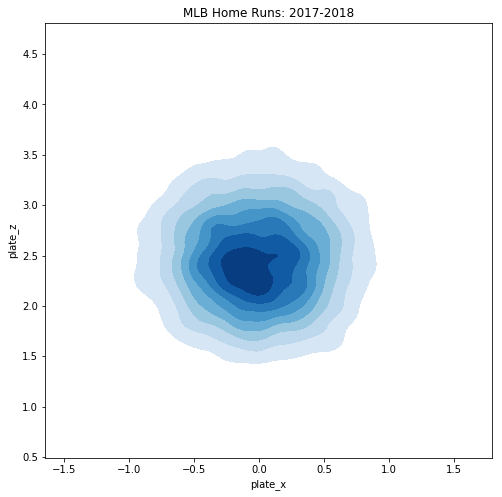

In [217]:
#create a kde plot for our data 2017-2018 HRs by plate x and z locations
f, ax = plt.subplots(figsize=(8, 8))
sns_allpitches = sns.kdeplot(heat_map_data.plate_x, heat_map_data.plate_z,
                 cmap="Blues", shade=True, shade_lowest=False, ax=ax).set_title('MLB Home Runs: 2017-2018')
plt.savefig('Images/MLB_HR_Location_KDE.png')

Text(0.5, 1.0, 'MLB 2017-2018 Home Runs: All Pitches')

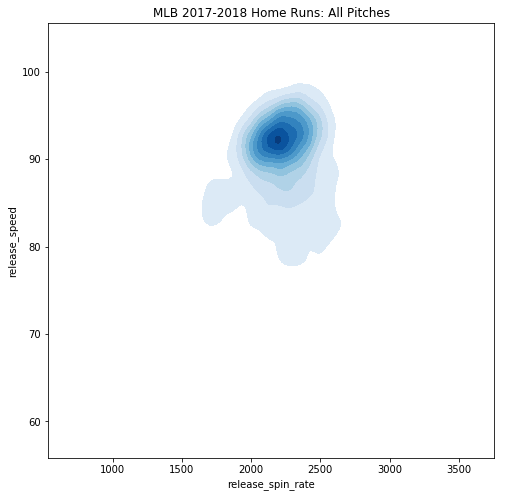

In [193]:
#create a kde plot for our data 2017-2018 HRs by spin rate and pitch velocity, all pitches
f2, ax2 = plt.subplots(figsize=(8, 8))
sns.kdeplot(heat_map_data.release_spin_rate, heat_map_data.release_speed,
                 cmap="Blues", shade=True, shade_lowest=False, ax=ax2).set_title('MLB 2017-2018 Home Runs: All Pitches')

In [194]:
#calculate the avg spin rate of a curveball and speed
avg_curve_spin = heat_map_cu.release_spin_rate.mean()
avg_curve_velo = heat_map_cu.release_speed.mean()
print(f'The average spin rate for a curveball was {avg_curve_spin}')
print(f'The average speed for a curveball was {avg_curve_velo}')

The average spin rate for a curveball was 2475.3370786516853
The average speed for a curveball was 77.72865168539322


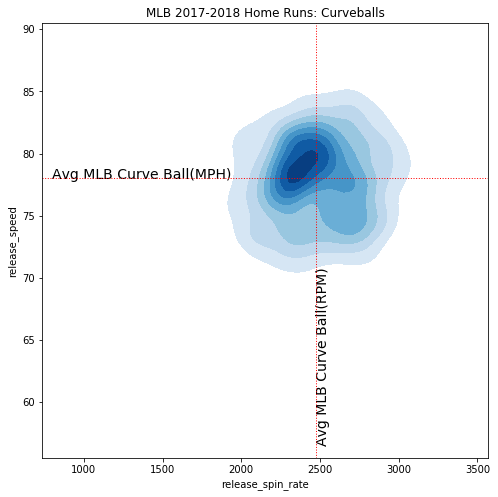

In [197]:
#create a kde plot for our data 2017-2018 HRs by spin rate and pitch velocity, curveballs
f3, ax3 = plt.subplots(figsize=(8, 8))
sns.kdeplot(heat_map_cu.release_spin_rate, heat_map_cu.release_speed,
                 cmap="Blues", shade=True,shade_lowest=False, ax=ax3).set_title('MLB 2017-2018 Home Runs: Curveballs')
ax3.axvline(2475, color='r', zorder=1, label='Avg MLB Curve Ball(RPM)', linewidth=1, linestyle=':')
ax3.axhline(78, color='r', zorder=1, label='Avg MLB Curve Ball(MPH)', linewidth=1, linestyle=':')
ax3.text(2475, 70,'Avg MLB Curve Ball(RPM)', rotation=90, zorder=0, fontsize=14)
ax3.text(800, 78,'Avg MLB Curve Ball(MPH)', zorder=0, fontsize=14)
plt.savefig('Images/MLB_HR_Curveballs_KDE.png')

In [198]:
#calculate the avg spin rate of a slider
avg_slider_spin = heat_map_sl.release_spin_rate.mean()
avg_slider_velo = heat_map_sl.release_speed.mean()
print(f'The average spin rate for a slider was {avg_slider_spin}')
print(f'The average speed for a slider was {avg_slider_velo}')

The average spin rate for a slider was 2347.8644776119404
The average speed for a slider was 84.24561194029859


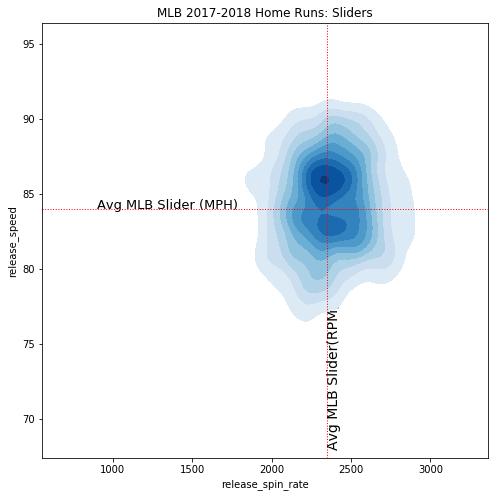

In [206]:
#create a kde plot for our data 2017-2018 HRs by spin rate and pitch velocity, sliders
f4, ax4 = plt.subplots(figsize=(8, 8))
sns.kdeplot(heat_map_sl.release_spin_rate, heat_map_sl.release_speed,
                 cmap="Blues", shade=True,shade_lowest=False, ax=ax4).set_title('MLB 2017-2018 Home Runs: Sliders')
ax4.axvline(2348, color='r', zorder=1, label='Avg Slider(RPM)', linewidth=1, linestyle=':')
ax4.axhline(84, color='r', zorder=1, label='Avg Slider(MPH)', linewidth=1, linestyle=':')
ax4.text(2348, 77,'Avg MLB Slider(RPM)', rotation=90, zorder=0, fontsize=14)
ax4.text(900, 84,'Avg MLB Slider (MPH)', zorder=0, fontsize=13)
plt.savefig('Images/MLB_HR_Sliders_KDE.png')

In [207]:
#calculate the avg spin rate of a four seam fastball and velo
avg_ff_spin = heat_map_ff.release_spin_rate.mean()
avg_ff_velo = heat_map_ff.release_speed.mean()
print(f'The average spin rate for a four-seam fastball was {avg_ff_spin}')
print(f'The average speed for a four-seam fastball was {avg_ff_velo}')

The average spin rate for a four-seam fastball was 2247.002146844139
The average speed for a four-seam fastball was 92.67118935165311


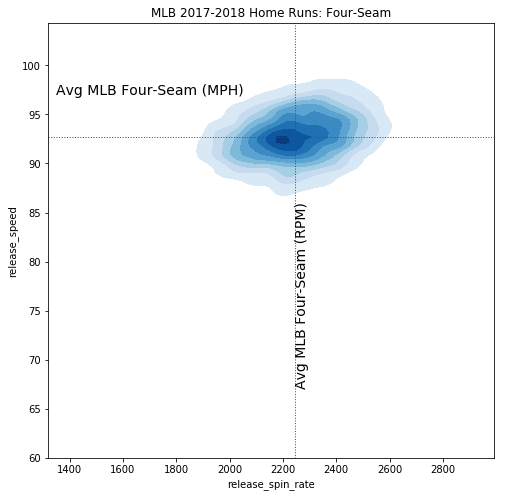

In [209]:
#create a kde plot for our data 2017-2018 HRs by spin rate and pitch velocity, four seam fastballs
f5, ax5 = plt.subplots(figsize=(8, 8))
sns.kdeplot(heat_map_ff.release_spin_rate, heat_map_ff.release_speed,
                 cmap="Blues", shade=True,shade_lowest=False, ax=ax5).set_title('MLB 2017-2018 Home Runs: Four-Seam')
ax5.axvline(2247, color='r', zorder=1, label='Avg Four-Seam(RPM)', linewidth=1, linestyle=':')
ax5.axhline(92.7, color='r', zorder=1, label='Avg Four-Seam(MPH)', linewidth=1, linestyle=':')
ax5.text(2247, 85,'Avg MLB Four-Seam (RPM)', rotation=90, zorder=0, fontsize=14)
ax5.text(1350, 97,'Avg MLB Four-Seam (MPH)', zorder=0, fontsize=14)
plt.savefig('Images/MLB_HR_FourSeam_KDE.png')

In [210]:
#create a kde plot for our data 2017-2018 HRs by spin rate and pitch velocity, change-ups
avg_ch_spin = heat_map_ch.release_spin_rate.mean()
avg_ch_velo = heat_map_ch.release_speed.mean()
print(f'The average spin rate for a change-up was {avg_ch_spin}')
print(f'The average speed for a change-up was {avg_ch_velo}')

The average spin rate for a change-up was 1781.2016326530613
The average speed for a change-up was 83.83248979591838


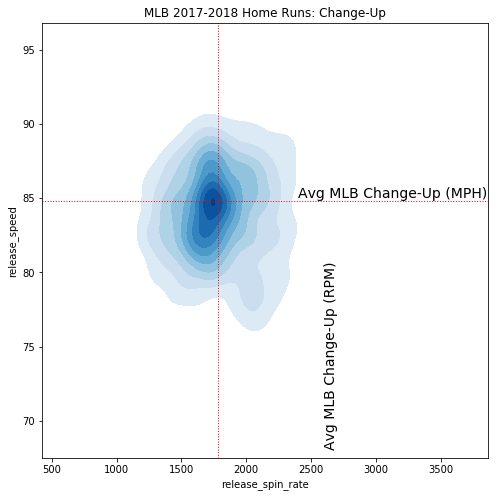

In [216]:
f6, ax6 = plt.subplots(figsize=(8, 8))
sns.kdeplot(heat_map_ch.release_spin_rate, heat_map_ch.release_speed,
                 cmap="Blues", shade=True,shade_lowest=False, ax=ax6).set_title('MLB 2017-2018 Home Runs: Change-Up')
ax6.axvline(1781, color='r', zorder=1, label='Avg Change-Up(RPM)', linewidth=1, linestyle=':')
ax6.axhline(84.8, color='r', zorder=1, label='Avg Change-Up(MPH)', linewidth=1, linestyle=':')
ax6.text(2600, ,'Avg MLB Change-Up (RPM)', rotation=90, zorder=0, fontsize=14)
ax6.text(2400, 85,'Avg MLB Change-Up (MPH)', zorder=0, fontsize=14)
plt.savefig('Images/MLB_HR_ChangeUp_KDE.png')

In [165]:
#use our zone data from statcast to look further into our data and HR distribution
# use functions created by Github user : btab2273, for zone analysis

def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        x = 1
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        x = 2
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        x = 3
        return 3

In [166]:
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        y=3
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        y=2
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        y=1
        return 1

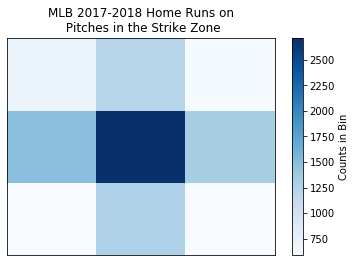

In [168]:
#here we will ignore zones 11,12,13 and 14 so we only focus on the strike zone
strike_zone_hr = heat_map_data.copy().loc[heat_map_data['zone'] <=9]

#assign our cartesian coordinates to pitches in the strike zone for mlb home runs from 2017-2018
strike_zone_hr['zone_x'] = strike_zone_hr.apply(assign_x_coord, axis=1)
strike_zone_hr['zone_y'] = strike_zone_hr.apply(assign_y_coord, axis=1)

#plot our home runs on a 2D histogram
plt.hist2d(x = strike_zone_hr['zone_x'], y=strike_zone_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('MLB 2017-2018 Home Runs on\n Pitches in the Strike Zone')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.savefig('Images/MLB_ALLHR_SZ.png')

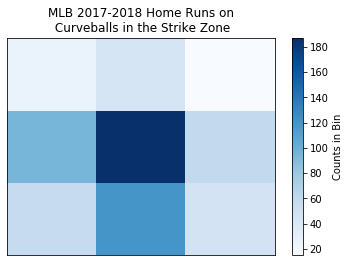

In [169]:
#analyze data for curveballs
#here we will ignore zones 11,12,13 and 14 so we only focus on the strike zone
cu_strike_zone_hr = heat_map_cu.copy().loc[heat_map_cu['zone'] <=9]

#assign our cartesian coordinates to pitches in the strike zone for mlb home runs from 2017-2018
cu_strike_zone_hr['zone_x'] = cu_strike_zone_hr.apply(assign_x_coord, axis=1)
cu_strike_zone_hr['zone_y'] = cu_strike_zone_hr.apply(assign_y_coord, axis=1)

#plot our home runs on a 2D histogram
plt.hist2d(x = cu_strike_zone_hr['zone_x'], y=cu_strike_zone_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('MLB 2017-2018 Home Runs on\n Curveballs in the Strike Zone')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.savefig('Images/MLB_CU_HR_SZ.png')

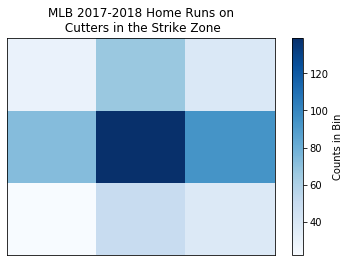

In [171]:
#analyze data for fastball cutters
#here we will ignore zones 11,12,13 and 14 so we only focus on the strike zone
fc_strike_zone_hr = heat_map_fc.copy().loc[heat_map_fc['zone'] <=9]

#assign our cartesian coordinates to pitches in the strike zone for mlb home runs from 2017-2018
fc_strike_zone_hr['zone_x'] = fc_strike_zone_hr.apply(assign_x_coord, axis=1)
fc_strike_zone_hr['zone_y'] = fc_strike_zone_hr.apply(assign_y_coord, axis=1)

#plot our home runs on a 2D histogram
plt.hist2d(x = fc_strike_zone_hr['zone_x'], y=fc_strike_zone_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('MLB 2017-2018 Home Runs on\n Cutters in the Strike Zone')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.savefig('Images/MLB_FC_HR_SZ.png')

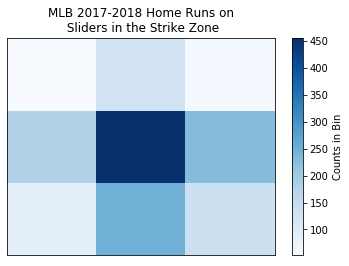

In [172]:
#analyze data for sliders
#here we will ignore zones 11,12,13 and 14 so we only focus on the strike zone
sl_strike_zone_hr = heat_map_sl.copy().loc[heat_map_sl['zone'] <=9]

#assign our cartesian coordinates to pitches in the strike zone for mlb home runs from 2017-2018
sl_strike_zone_hr['zone_x'] = sl_strike_zone_hr.apply(assign_x_coord, axis=1)
sl_strike_zone_hr['zone_y'] = sl_strike_zone_hr.apply(assign_y_coord, axis=1)

#plot our home runs on a 2D histogram
plt.hist2d(x = sl_strike_zone_hr['zone_x'], y=sl_strike_zone_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('MLB 2017-2018 Home Runs on\n Sliders in the Strike Zone')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.savefig('Images/MLB_SL_HR_SZ.png')

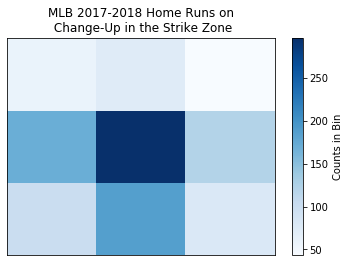

In [173]:
#analyze data for change-ups
#here we will ignore zones 11,12,13 and 14 so we only focus on the strike zone
ch_strike_zone_hr = heat_map_ch.copy().loc[heat_map_ch['zone'] <=9]

#assign our cartesian coordinates to pitches in the strike zone for mlb home runs from 2017-2018
ch_strike_zone_hr['zone_x'] = ch_strike_zone_hr.apply(assign_x_coord, axis=1)
ch_strike_zone_hr['zone_y'] = ch_strike_zone_hr.apply(assign_y_coord, axis=1)

#plot our home runs on a 2D histogram
plt.hist2d(x = ch_strike_zone_hr['zone_x'], y=ch_strike_zone_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('MLB 2017-2018 Home Runs on\n Change-Up in the Strike Zone')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.savefig('Images/MLB_CH_HR_SZ.png')

In [ ]:
#based on above data, might be a good idea to look at our information on a left handed and right handed batter

In [ ]:
# Z = np.zeros((len(heat_map_data.plate_x), len(heat_map_data.plate_z)))
# pos = []
# vals = []
# for i, x in enumerate(heat_map_data.iterrows()):
#     pos.append((i,i))
#     #print(x)
#     vals.append(x[1]['release_spin_rate'])
    
# rows, cols = zip(*pos)
# Z[rows, cols] = vals

In [ ]:
# f, ax = plt.subplots(figsize=(12, 12))
# plt.contourf(heat_map_data.plate_x, heat_map_data.plate_z,Z, cmap='RdGy')
# plt.colorbar()

In [ ]:
# plt